# **Aim**: Proof that weight distributions in the critical regime are normal distributions

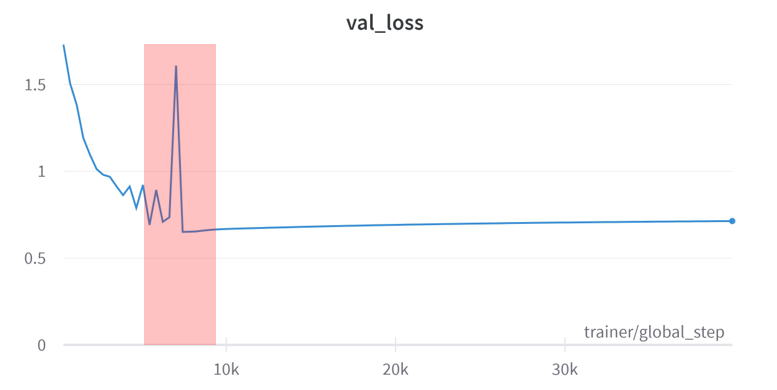

In [7]:
import wandb
import torch
import matplotlib.pyplot as plt
import numpy as np
from const import PATH_CHECKPOINTS_DIR
import os

# Load weights from checkpoints

In [3]:
def get_list_of_weights(weights) :
    list_of_weights = []
    for key, value in weights.items():
        if key.endswith('weight') :
            list_of_weights.append((key, value))
    return list_of_weights

In [12]:
three_solutions = {}
file_paths = os.listdir(PATH_CHECKPOINTS_DIR)

for i, path in enumerate(file_paths):
    checkpoint = torch.load(os.path.join(PATH_CHECKPOINTS_DIR, path), map_location=torch.device('cpu'))
    model_weights = checkpoint['state_dict']
    list_of_weights = get_list_of_weights(model_weights)
    all_weights = np.concatenate([w[1].numpy().flatten() for w in list_of_weights])
    three_solutions[i] = all_weights

Global seed set to 0


{0: array([-0.02812551,  0.07813454, -0.2024909 , ...,  0.02896328,
        -0.01322693, -0.00131988], dtype=float32),
 1: array([-0.02775614,  0.07875936, -0.20174246, ...,  0.02957291,
        -0.01325868, -0.00055408], dtype=float32),
 2: array([-0.0275287 ,  0.07900168, -0.20151098, ...,  0.03036839,
        -0.01251138,  0.00043015], dtype=float32)}

# Histograms

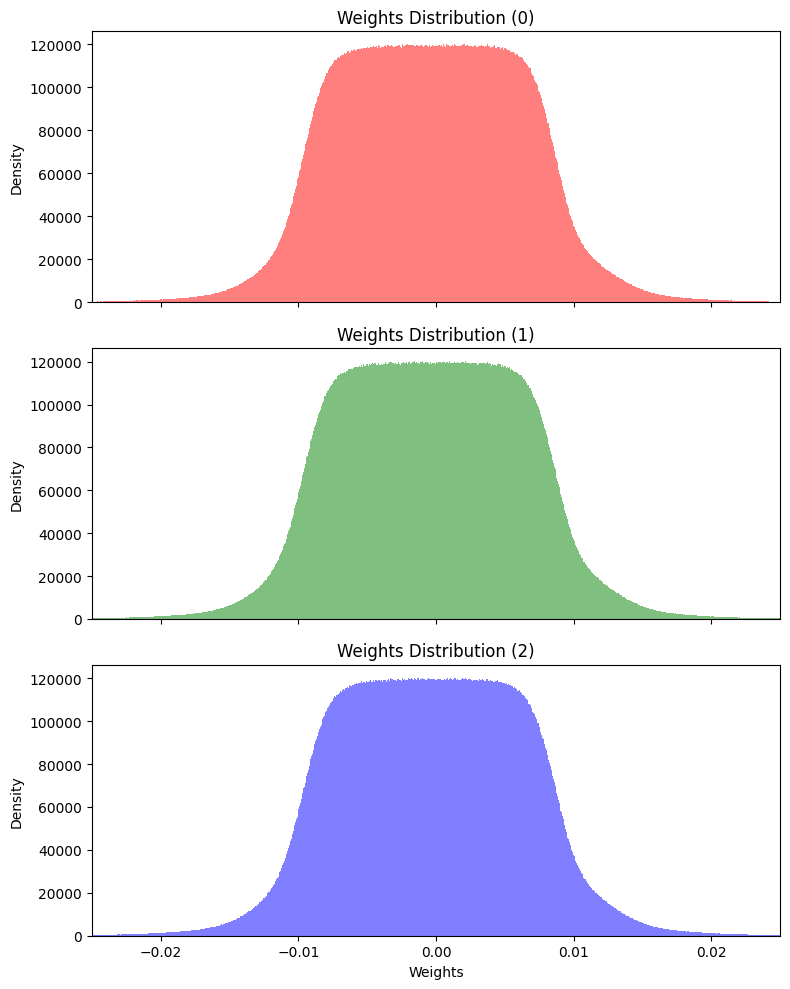

In [17]:
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(len(three_solutions), 1, figsize=(8, 10), sharex=True)
for i, (key, value) in enumerate(three_solutions.items()):
    ax = axes[i]
    ax.hist(value, bins='auto', alpha=0.5, label=key, color=colors[i])
    ax.set_ylabel('Density')
    ax.set_title(f'Weights Distribution ({key})')
    ax.set_xlim(-0.025, 0.025)

plt.xlabel('Weights')
plt.tight_layout()
plt.show()
